<a href="https://colab.research.google.com/github/kumarashutosh22/Kaggle/blob/master/MSRP_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle API and data unzipping

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d CooperUnion/cardataset

  0% 0.00/103k [00:00<?, ?B/s]
100% 103k/103k [00:00<00:00, 32.9MB/s]


In [ ]:
! unzip cardataset.zip

Archive:  cardataset.zip
  inflating: data.csv                


# Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Reading the data

In [ ]:
car = pd.read_csv('data.csv')

# Basic EDA

In [ ]:
car.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [ ]:
# Make                Car Make
# Model               Car Model
# Year                Car Year (Marketing)
# Engine Fuel Type    Engine Fuel Type
# Engine HP           Engine Horse Power (HP)
# Engine Cylinders    Engine Cylinders
# Transmission Type   Transmission Type
# Driven_Wheels       Driven Wheels
# Number of Doors     Number of Doors
# Market Category     Market Category
# Vehicle Size        Size of Vehicle
# Vehicle Style       Type of Vehicle
# highway MPG         Highway MPG
# city mpg            City MPG
# Popularity          Popularity (Twitter)
# MSRP                Manufacturer Suggested Retail Price

# MPG is a automotive term meaning miles per galon
# it denotes how far a vehicle will travel (in miles == 1.61 KM) on a galon (3.79 Litres) of fuel.

# MSRP is the price of the vehicle that is recommended by the manufacturer.

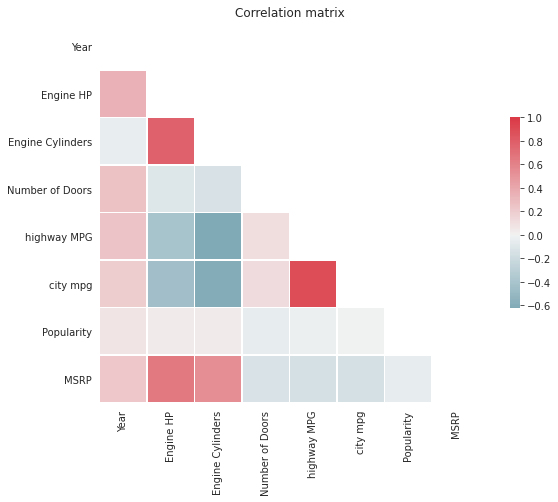

In [ ]:
corr = car.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)

# return the indices for the upper triangle of an (n,m) array
mask[np.triu_indices_from(mask)] = True

# Plot
sns.set_style("white")
f, ax = plt.subplots(figsize=(11,7))
plt.title("Correlation matrix")
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220,10, as_cmap=True),
            square=True, vmax = 1, center = 0, linewidths = .5, cbar_kws = {"shrink": .5})

plt.show()

In [ ]:
car.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# Cleaning

In [ ]:
car2 = car.copy()

In [ ]:
car['Engine Fuel Type'].unique()

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [ ]:
car2['Engine Fuel Type'].replace(
    ['premium unleaded (required)', 'regular unleaded',
     'premium unleaded (recommended)'],'unleaded',inplace=True)

In [ ]:
car2['Engine Fuel Type'].replace(
    ['flex-fuel (premium unleaded recommended/E85)',
     'flex-fuel (premium unleaded required/E85)',
     'flex-fuel (unleaded/natural gas)',
     'flex-fuel (unleaded/E85)'],'flex-fuel',inplace=True)

In [ ]:
car2['Engine Fuel Type'].fillna(car2['Engine Fuel Type'].mode()[0],inplace=True)

In [ ]:
car2['Engine HP'].fillna(car2['Engine HP'].mean(),inplace=True)

In [ ]:
car2['Engine Cylinders'].fillna(0,inplace=True)

In [ ]:
car2[car2['Number of Doors'].isna()]
# Ferrari FF == 3 doors
# Tesla S    == 5 doors

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4666,Ferrari,FF,2013,unleaded,651.00000,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
6930,Tesla,Model S,2016,electric,249.38607,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,105,102,1391,79500
6931,Tesla,Model S,2016,electric,249.38607,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,101,98,1391,66000
6932,Tesla,Model S,2016,electric,249.38607,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,High-Performance",Large,Sedan,105,92,1391,134500
6933,Tesla,Model S,2016,electric,249.38607,0.0,DIRECT_DRIVE,rear wheel drive,NaN,"Exotic,Performance",Large,Sedan,100,97,1391,74500
6934,Tesla,Model S,2016,electric,249.38607,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,107,101,1391,71000


In [ ]:
car2.loc[4666,'Number of Doors'] = 3
car2.loc[6930:6934,'Number of Doors'] = 5

In [ ]:
car2['Market Category'].fillna('No Category',inplace=True)

In [ ]:
set(item for sub in [i.split(',') for i in car2['Market Category'].unique()] for item in sub)

# Crossover
# Exotic
# Factory Tuner
# High Performance
# Hybrid
# Luxury
# No Category
# Performance

{'Crossover',
 'Diesel',
 'Exotic',
 'Factory Tuner',
 'Flex Fuel',
 'Hatchback',
 'High-Performance',
 'Hybrid',
 'Luxury',
 'No Category',
 'Performance'}

In [ ]:
make_mapping = {make:id for id,make in enumerate(car2['Make'].unique())}

car2['Make'] = car2['Make'].map(make_mapping)

In [ ]:
model_mapping = {model:id for id,model in enumerate(car2['Model'].unique())}

car2['Model'] = car2['Model'].map(model_mapping)

In [ ]:
for column in car2.select_dtypes(object).columns:
  print(car2[column].unique())
  print()

['unleaded' 'flex-fuel' 'diesel' 'electric' 'natural gas']

['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL' 'DIRECT_DRIVE' 'UNKNOWN']

['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive']

['Factory Tuner,Luxury,High-Performance' 'Luxury,Performance'
 'Luxury,High-Performance' 'Luxury' 'Performance' 'Flex Fuel'
 'Flex Fuel,Performance' 'No Category' 'Hatchback'
 'Hatchback,Luxury,Performance' 'Hatchback,Luxury'
 'Luxury,High-Performance,Hybrid' 'Diesel,Luxury' 'Hatchback,Performance'
 'Hatchback,Factory Tuner,Performance' 'High-Performance'
 'Factory Tuner,High-Performance' 'Exotic,High-Performance'
 'Exotic,Factory Tuner,High-Performance' 'Factory Tuner,Performance'
 'Crossover' 'Exotic,Luxury' 'Exotic,Luxury,High-Performance'
 'Exotic,Luxury,Performance' 'Factory Tuner,Luxury,Performance'
 'Flex Fuel,Luxury' 'Crossover,Luxury'
 'Hatchback,Factory Tuner,Luxury,Performance' 'Crossover,Hatchback'
 'Hybrid' 'Luxury,Performance,Hybrid'
 'Crossover,Luxury,Performance,Hyb

In [ ]:
car2['Vehicle Style'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

In [ ]:
car2['Vehicle Style'].replace(['4dr Hatchback','2dr Hatchback'],'Hatchback',inplace=True)
car2['Vehicle Style'].replace(['Passenger Minivan', 'Cargo Minivan'],'Minivan',inplace=True)
car2['Vehicle Style'].replace(['4dr SUV','2dr SUV','Convertible SUV'],'SUV',inplace=True)
car2['Vehicle Style'].replace(['Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup'],'Pickup',inplace=True)
car2['Vehicle Style'].replace(['Cargo Van','Passenger Van'],'Van',inplace=True)

In [ ]:
car2['Vehicle Style'].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', 'Hatchback', 'SUV',
       'Minivan', 'Pickup', 'Van'], dtype=object)

In [ ]:
car2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  int64  
 1   Model              11914 non-null  int64  
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11914 non-null  object 
 4   Engine HP          11914 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11914 non-null  float64
 9   Market Category    11914 non-null  object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(7

In [ ]:
car3 = car2.copy()

for col in ['Engine Fuel Type','Transmission Type','Driven_Wheels','Vehicle Size','Vehicle Style']:
  car3.drop(col,axis =1,inplace=True)
  car3 = pd.concat([car3,pd.get_dummies(car2[col],drop_first=True)],axis=1)

car3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  int64  
 1   Model              11914 non-null  int64  
 2   Year               11914 non-null  int64  
 3   Engine HP          11914 non-null  float64
 4   Engine Cylinders   11914 non-null  float64
 5   Number of Doors    11914 non-null  float64
 6   Market Category    11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
 9   Popularity         11914 non-null  int64  
 10  MSRP               11914 non-null  int64  
 11  electric           11914 non-null  uint8  
 12  flex-fuel          11914 non-null  uint8  
 13  natural gas        11914 non-null  uint8  
 14  unleaded           11914 non-null  uint8  
 15  AUTOMATIC          11914 non-null  uint8  
 16  DIRECT_DRIVE       119

In [ ]:
for col in ['Crossover', 'Exotic', 'Factory Tuner', 'High-Performance', 'Hybrid', 'Luxury', 'No Category','Performance']:
  for i in range(len(car3)):
    if col in car3.loc[i,'Market Category']:
      car3.loc[i,col] = 1
    else:
      car3.loc[i,col] = 0

car3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 40 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  int64  
 1   Model              11914 non-null  int64  
 2   Year               11914 non-null  int64  
 3   Engine HP          11914 non-null  float64
 4   Engine Cylinders   11914 non-null  float64
 5   Number of Doors    11914 non-null  float64
 6   Market Category    11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
 9   Popularity         11914 non-null  int64  
 10  MSRP               11914 non-null  int64  
 11  electric           11914 non-null  uint8  
 12  flex-fuel          11914 non-null  uint8  
 13  natural gas        11914 non-null  uint8  
 14  unleaded           11914 non-null  uint8  
 15  AUTOMATIC          11914 non-null  uint8  
 16  DIRECT_DRIVE       119

In [ ]:
car3.drop('Market Category',axis=1,inplace=True)

In [ ]:
# car3.to_excel('car3.xlsx')

In [ ]:
car3.corr()['MSRP']

Make                 0.047817
Model               -0.027905
Year                 0.227590
Engine HP            0.661644
Engine Cylinders     0.526274
Number of Doors     -0.126060
highway MPG         -0.160043
city mpg            -0.157676
Popularity          -0.048476
MSRP                 1.000000
electric             0.009125
flex-fuel            0.013789
natural gas         -0.002701
unleaded            -0.014852
AUTOMATIC            0.012912
DIRECT_DRIVE         0.008517
MANUAL              -0.132511
UNKNOWN             -0.024971
four wheel drive    -0.032110
front wheel drive   -0.239131
rear wheel drive     0.151225
Large                0.121949
Midsize             -0.019749
Coupe                0.199526
Hatchback           -0.114565
Minivan             -0.053835
Pickup              -0.092868
SUV                 -0.017812
Sedan               -0.012916
Van                 -0.040052
Wagon               -0.057205
Crossover           -0.029908
Exotic               0.665619
Factory Tu

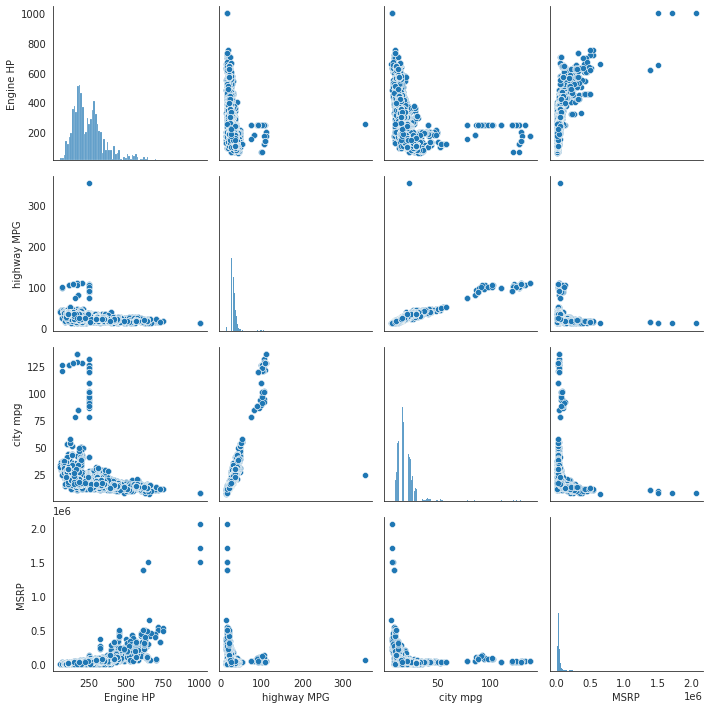

In [ ]:
sns.pairplot(car3[['Engine HP','highway MPG','city mpg','MSRP']])
plt.show()

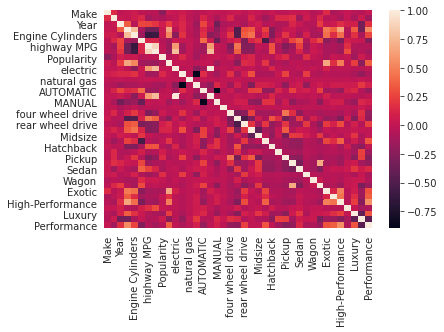

In [ ]:
sns.heatmap(car3.corr())

In [ ]:
X = car3.drop('MSRP',1)
y = car3['MSRP']

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [round(variance_inflation_factor(X.values, i)) for i in range(X.shape[1])]

    return(vif)


calc_vif(X).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
variables,Make,Model,Popularity,flex-fuel,natural gas,DIRECT_DRIVE,MANUAL,UNKNOWN,four wheel drive,front wheel drive,rear wheel drive,Large,Midsize,Coupe,Hatchback,Minivan,Pickup,SUV,Sedan,Van,Wagon,Crossover,Exotic,Factory Tuner,High-Performance,Hybrid,Luxury,No Category,Performance
VIF,5,4,2,2,1,1,2,1,3,4,3,2,3,2,2,2,4,7,4,2,2,4,2,1,2,1,2,4,3


In [ ]:
X.drop(['Year','city mpg','highway MPG','Number of Doors','unleaded',
        'Engine Cylinders','electric','Engine HP','AUTOMATIC'],axis=1,inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split as tts

Xtr, Xts, ytr, yts = tts(X,y,test_size=0.3,random_state=0,shuffle=True)
Xtr.shape,Xts.shape,ytr.shape,yts.shape

((8339, 29), (3575, 29), (8339,), (3575,))

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(Xtr,ytr)
ypr = regr.predict(Xts)

print("R squared: {}".format(r2_score(y_true=yts,y_pred=ypr)))

residuals = yts.values-ypr
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))
# mean of residual very close to 0

R squared: 0.7031434453070902
Mean of Residuals -1079.9295221905652


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=0)
rf.fit(Xtr,ytr)
ypr = rf.predict(Xts)
print("Accuracy: {}".format(rf.score(Xts,yts)))
print("R squared: {}".format(r2_score(y_true=yts,y_pred=ypr)))

Accuracy: 0.9140272047460736
R squared: 0.9140272047460736


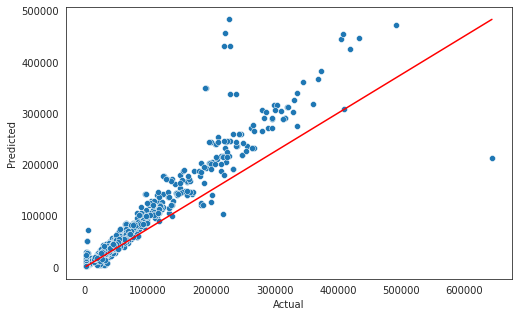

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=yts,y=ypr)
sns.lineplot(x=[min(yts),max(yts)],y=[min(ypr),max(ypr)],color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [ ]:
from xgboost import XGBRegressor,XGBRFRegressor
xgbr = XGBRegressor(colsample_bytree=0.7,learning_rate=0.07,max_depth=5,
                    min_child_weight=4,n_estimators=500,
                    nthread=4,reg='linear',silent=1,subsample='0.7',random_state=0)
xgbr.fit(Xtr,ytr)
yprx = xgbr.predict(Xts)
print("Accuracy: {}".format(xgbr.score(Xts,yts)))
print("R squared: {}".format(r2_score(y_true=yts,y_pred=yprx)))

Accuracy: 0.8929622959036146
R squared: 0.8929622959036146


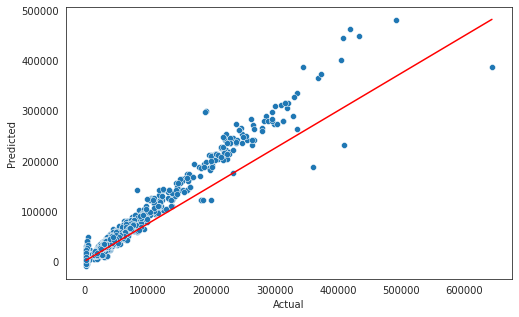

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=yts,y=yprx)
sns.lineplot(x=[min(yts),max(yts)],y=[min(ypr),max(ypr)],color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()